In [1]:
import tensorflow as tf
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
import random
import cv2
import pdb

In [2]:
label={"bald_uakari":0,"black_headed_night_monkey":1,"common_squirrel_monkey":2,"japanese_macaque":3,"mantled_howler":4,
       "nilgiri_langur":5,"patas_monkey":6,"pygmy_marmoset":7,"silvery_marmoset":8, "white_headed_capuchin":9}

train_img = []
test_img = []
val_img = []
t = []
y = []
k=list(label.keys())

In [3]:
k[label["bald_uakari"]]

'bald_uakari'

In [4]:
x=glob("sample/*/*.jpg")
x[0].split('\\')[-2]
x[0]

'sample\\bald_uakari\\12961458824_14a6951c26_w.jpg'

In [5]:
for i in range(10):
    t={0:glob('sample/bald_uakari/*.jpg'),
       1:glob('sample/black_headed_night_monkey/*.jpg'),
       2:glob('sample/common_squirrel_monkey/*.jpg'),
       3:glob('sample/japanese_macaque/*.jpg'),
       4:glob('sample/mantled_howler/*.jpg'),
       5:glob('sample/nilgiri_langur/*.jpg'),
       6:glob('sample/patas_monkey/*.jpg'),
       7:glob('sample/pygmy_marmoset/*.jpg'),
       8:glob('sample/silvery_marmoset/*.jpg'),
       9:glob('sample/white_headed_capuchin/*.jpg')}.get(i)
    
    lent = int(len(t)*0.8)

    for j in range(lent):
        train_img.append([cv2.resize(cv2.imread(t[0], cv2.IMREAD_COLOR), dsize=(128, 128), interpolation=cv2.INTER_AREA), 
                      label[t[0].split('\\')[-2].split('/')[-1]]])
        train_img.append([cv2.resize(cv2.flip(cv2.imread(t[0], 1), cv2.IMREAD_COLOR), dsize=(128, 128), interpolation=cv2.INTER_AREA), 
                      label[t[0].split('\\')[-2].split('/')[-1]]])
        t.pop(0)

    lent = int(len(t)*0.5)
    for j in range(lent):
        val_img.append([cv2.resize(cv2.imread(t[0], cv2.IMREAD_COLOR), dsize=(128, 128), interpolation=cv2.INTER_AREA), 
                     label[t[0].split('\\')[-2].split('/')[-1]]])
        t.pop(0)
        
    lent = len(t)
    for j in range(lent):
        test_img.append([cv2.resize(cv2.imread(t[0], cv2.IMREAD_COLOR), dsize=(128, 128), interpolation=cv2.INTER_AREA), 
                     label[t[0].split('\\')[-2].split('/')[-1]]])
        t.pop(0)
        
    #test_img.append(cv2.flip(test_img[-1], 1))
    
    print (i, " done")


0  done
1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done


In [6]:
len(train_img)

11326

In [7]:
len(test_img)

712

In [8]:
random.shuffle(train_img)
random.shuffle(test_img)
random.shuffle(val_img)

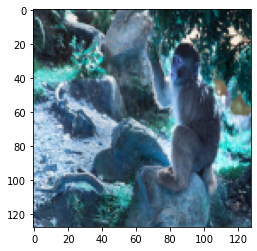

In [9]:
plt.imshow(train_img[10][0])

In [10]:
k[train_img[10][1]]

'japanese_macaque'

In [11]:
IMG_H = 128
IMG_W = 128
IMG_C = 3

num_class = 10


In [38]:
with tf.Graph().as_default() as tfgp:
    X = tf.placeholder(tf.float32, [None, IMG_H, IMG_W, IMG_C])
    Y = tf.placeholder(tf.int32, [None])

    with tf.variable_scope('CNN'):
        
        layer = tf.layers.conv2d(X, 48, 5, (2, 2), padding='same', activation=tf.nn.relu)
        layer = tf.layers.max_pooling2d(layer, (2, 2), (2, 2))
        layer = tf.layers.conv2d(layer, 128, 3, (1, 1), padding='same', activation=tf.nn.relu)        
        layer = tf.layers.max_pooling2d(layer, (2, 2), (2, 2))
        layer = tf.layers.conv2d(layer, 128, 3, (1, 1), padding='same', activation=tf.nn.relu)
        layer = tf.layers.conv2d(layer, 128, 3, (1, 1), padding='same', activation=tf.nn.relu)
        layer = tf.layers.max_pooling2d(layer, (3, 3), (2, 2))
        layer = tf.layers.flatten(layer)
        
        #layer = tf.layers.dense(layer, 1024)
        out = tf.layers.dense(layer, num_class)

    with tf.variable_scope('Loss'):
        loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y, logits=out))

    train = tf.train.AdamOptimizer(1e-3).minimize(loss)
    saver = tf.train.Saver()

In [39]:
np.sum([np.product(var.shape) for var in tfgp.get_collection('trainable_variables')]).value

416970

In [40]:
train_image = []
train_label = []
test_image = []
test_label = []
val_image = []
val_label = []
val = []
tra = []
cnt=0

bs=128

In [41]:
lentrain = (len(train_img))
len(test_image)

0

In [42]:
lenval = len(val_img)
for i in range(lenval):
    val_image.append(val_img[i][0])
    val_label.append(val_img[i][1])

In [43]:
with tf.Session(graph=tfgp) as sess:
    sess.run(tf.global_variables_initializer())   
    for i in range(1700):
        #pdb.set_trace()
        for j in range(bs):
            train_image.append(train_img[0][0])
            train_label.append(train_img[0][1])
            train_img.append(train_img.pop(0))
            
        _, loss_t = sess.run([train, loss], feed_dict={X: train_image, Y: train_label})
        #print(i, l)
        tra.append(loss_t)

        for j in range(bs):
            train_image.pop(0)
            train_label.pop(0)
        
        
        if i%50==0:
            loss_t = sess.run(loss, feed_dict={X: val_image, Y: val_label})
            val.append(loss_t)
    
            print("[", cnt*50, "]", val[-1])
            cnt = cnt+1
    
    print("val: ", np.argmin(val))
    saver.save(sess, 'logs/model.ckpt', global_step=i + 1)

[ 0 ] 70.706375
[ 50 ] 1.8738697
[ 100 ] 1.5239801
[ 150 ] 1.3464166
[ 200 ] 1.339129
[ 250 ] 1.3830764
[ 300 ] 1.1463076
[ 350 ] 1.1841279
[ 400 ] 1.1621482
[ 450 ] 1.1128391
[ 500 ] 1.1160737
[ 550 ] 0.9957374
[ 600 ] 1.1019177
[ 650 ] 1.0235109
[ 700 ] 1.2339299
[ 750 ] 1.0594888
[ 800 ] 1.1417919
[ 850 ] 0.9976044
[ 900 ] 1.298752
[ 950 ] 1.2144362
[ 1000 ] 1.3668278
[ 1050 ] 1.2757993
[ 1100 ] 1.4162474
[ 1150 ] 1.1992095
[ 1200 ] 1.45912
[ 1250 ] 1.6494449
[ 1300 ] 1.4674188
[ 1350 ] 1.5937163
[ 1400 ] 1.7762574
[ 1450 ] 1.3729277
[ 1500 ] 1.6353567
[ 1550 ] 1.6107205
[ 1600 ] 1.4596816
[ 1650 ] 1.5786582
val:  11


In [44]:
for i in range(int(len(tra))):
    print ("[%d]" %i, tra[i])

[0] 35.886368
[1] 80.92662
[2] 69.734726
[3] 59.07903
[4] 33.171207
[5] 22.858381
[6] 14.875321
[7] 8.660529
[8] 4.8074727
[9] 3.626051
[10] 3.2108033
[11] 3.1202004
[12] 2.690168
[13] 2.498087
[14] 2.6990135
[15] 2.2768207
[16] 2.3255696
[17] 2.3760273
[18] 2.2762887
[19] 2.315764
[20] 2.2321672
[21] 2.2956
[22] 2.216507
[23] 2.236816
[24] 2.2196777
[25] 2.1273308
[26] 2.2083442
[27] 2.2716367
[28] 2.1784177
[29] 2.199754
[30] 2.1783946
[31] 2.2014565
[32] 2.1246877
[33] 2.1134796
[34] 2.122381
[35] 2.1594732
[36] 2.2014828
[37] 2.085966
[38] 2.081789
[39] 2.1145556
[40] 2.0102398
[41] 2.1443458
[42] 2.0986578
[43] 2.1533186
[44] 2.045177
[45] 2.0420241
[46] 2.0249264
[47] 1.9983785
[48] 1.9052699
[49] 1.9233094
[50] 1.9824569
[51] 1.88083
[52] 1.9007206
[53] 1.9831383
[54] 2.0069413
[55] 1.9167655
[56] 1.9713565
[57] 1.9459202
[58] 1.8452139
[59] 1.8812172
[60] 1.8539827
[61] 1.9407002
[62] 2.0825982
[63] 1.8023505
[64] 1.8950955
[65] 1.8573931
[66] 1.9373089
[67] 1.75438
[68] 1.8113

In [45]:
acc = 0
cnt = 1
lentest = len(test_img)


In [46]:
lentest

712

In [47]:
with tf.Session(graph=tfgp) as sess:
    sess.run(tf.global_variables_initializer())
    checkpoint = tf.train.latest_checkpoint('logs')
    if checkpoint:
        saver.restore(sess, checkpoint)
    for i in range(lentest):
        test_image.append(test_img[0][0])
        logit = sess.run(out, feed_dict={X: test_image})
        
        if np.argmax(logit[0]) == test_img[0][1]:
            acc += 1
            cv2.imwrite("./true/%s%d.jpg"%(k[test_img[0][1]],cnt), test_img[0][0])
            cnt = cnt+1
            
        else:
            print(logit[0], k[np.argmax(logit[0])], k[test_img[0][1]])
            cv2.imwrite("./false/%s%d.jpg"%(k[test_img[0][1]],cnt), test_img[0][0])
            cnt = cnt+1
            
            #cv2.imshow(k[np.argmax(logit[0])], test_image[0])
            #cv2.waitKey(0)
            #cv2.destroyAllWindows()

        test_img.append(test_img.pop(0))
        test_image.pop(0)

    print(acc / lentest)

INFO:tensorflow:Restoring parameters from logs\model.ckpt-1700
[-44.37157     -3.652303   -14.403517    -0.24318396  20.415897
  24.704327   -11.052724     1.9190496    0.4762287   23.005     ] nilgiri_langur mantled_howler
[ 1.3442822  3.6827767  1.8645372  5.6539083  2.2110147 11.460881
  5.875414   6.022503   9.389176  18.168312 ] white_headed_capuchin nilgiri_langur
[-7.0084214  8.403132   7.21017    5.298971   4.5502934 12.231745
 17.150879  -0.7699882  9.235741  13.2923   ] patas_monkey common_squirrel_monkey
[-1.0077622  -0.26263678  4.689274    1.2772584  16.761251    8.531438
  6.7292147   6.301941    7.9956365   8.924877  ] mantled_howler common_squirrel_monkey
[ 6.5787163 -0.8578495  9.433155   2.3346798 13.029213  13.608439
 17.972544  -0.6932816 13.060296   8.147103 ] patas_monkey nilgiri_langur
[-8.301127   -1.9829786  -9.27396    -1.9754316  18.37216    23.037064
  7.548592    2.8181105  -0.20720983 15.612664  ] nilgiri_langur mantled_howler
[-4.16093    4.7564516  6.158